In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import scipy
import sklearn

from sklearn.cross_validation import train_test_split


from sklearn import datasets, cluster
from mpl_toolkits.mplot3d import Axes3D
from numpy import genfromtxt

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## https://www.dataquest.io/blog/machine-learning-python/

In [2]:
%matplotlib inline

In [40]:
pre_emily = pd.read_csv('Respondents Facce emily_mid.txt', sep='\t')
pre_connor = pd.read_csv('Respondents Facce connor_mid.txt', sep='\t')

In [41]:
timestamp_to_reappend = pre_emily.loc[:,'Timestamp']
# Timestamp is going to be zero'd out for all of this, but otherwise the FACET columns should be Emily's values minus Connor's values.
pre_emily_minus_connor = pre_emily - pre_connor
# Fix the Timestamp column
pre_emily_minus_connor.loc[:, 'Timestamp'] = timestamp_to_reappend
display(pre_emily_minus_connor)

,Timestamp,Joy (Emotient FACET),Anger (Emotient FACET),Surprise (Emotient FACET),Fear (Emotient FACET),Contempt (Emotient FACET),Disgust (Emotient FACET),Sadness (Emotient FACET),Confusion (Emotient FACET),Frustration (Emotient FACET),...,AU15 (Emotient FACET),AU17 (Emotient FACET),AU18 (Emotient FACET),AU20 (Emotient FACET),AU23 (Emotient FACET),AU24 (Emotient FACET),AU25 (Emotient FACET),AU26 (Emotient FACET),AU28 (Emotient FACET),AU43 (Emotient FACET)
0,400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,1400,5.423813,1.279504,0.570080,1.871312,4.153564,3.429971,2.573982,2.863193,2.869297,...,3.601514,3.148250,2.037004,4.458306,3.328611,3.560404,3.950376,3.678588,3.456107,4.621380
6,1600,5.297655,1.211092,0.032146,1.563898,4.211062,3.485283,2.506148,3.144210,3.128059,...,3.408870,3.198834,2.219283,4.591558,3.263501,3.640215,3.907708,3.840758,3.713582,4.928532
7,1800,5.267308,1.397925,0.108403,1.406988,4.262870,3.632235,2.710242,3.145075,3.074620,...,3.617704,3.406827,2.231977,4.332520,3.327337,3.666806,3.517866,3.483867,3.488682,4.617239
8,2000,5.467695,1.098940,-0.068888,1.699403,4.159801,3.321390,2.372212,2.920322,3.092883,...,3.213213,3.323946,1.856690,4.762688,3.246415,3.588121,3.987812,3.885436,3.824097,5.174544
9,2200,5.433496,1.378485,0.400303,1.612077,4.218805,3.524305,2.698062,3.109645,3.081970,...,3.594557,3.336626,2.249655,4.195521,3.310446,3.702855,3.462456,3.322076,3.380751,4.671004


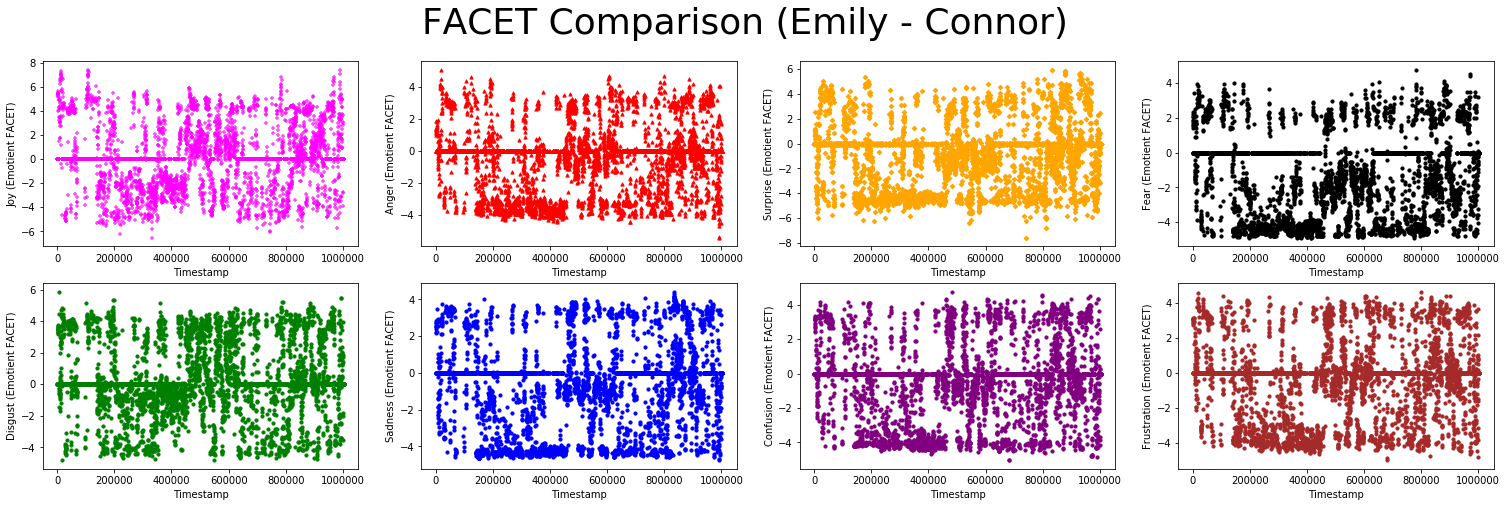

In [42]:
# visualize the relationship between the features and the response using scatterplots
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6,ax7,ax8)) = plt.subplots(2, 4, sharey=False)

pre_emily_minus_connor.plot(kind='scatter', x='Timestamp', y='Joy (Emotient FACET)', ax=ax1, figsize=(26, 7.5), s=10, color="magenta", marker="+", alpha=.7)
pre_emily_minus_connor.plot(kind='scatter', x='Timestamp', y='Anger (Emotient FACET)', ax=ax2, s=10, color="red",marker="^")
pre_emily_minus_connor.plot(kind='scatter', x='Timestamp', y='Surprise (Emotient FACET)', ax=ax3, s=10,  color="orange", marker="D")
pre_emily_minus_connor.plot(kind='scatter', x='Timestamp', y='Fear (Emotient FACET)', ax=ax4, s=10,  color="black")
pre_emily_minus_connor.plot(kind='scatter', x='Timestamp', y='Disgust (Emotient FACET)', ax=ax5, s=10, color="green")
pre_emily_minus_connor.plot(kind='scatter', x='Timestamp', y='Sadness (Emotient FACET)', ax=ax6, s=10, color="blue")
pre_emily_minus_connor.plot(kind='scatter', x='Timestamp', y='Confusion (Emotient FACET)', ax=ax7, s=10, color="purple")
pre_emily_minus_connor.plot(kind='scatter', x='Timestamp', y='Frustration (Emotient FACET)', ax=ax8, s=10, color="brown")

fig.suptitle('FACET Comparison (Emily - Connor)', size='36')

In [83]:
# print the shape of the DataFrame
data.shape

(24253, 10)

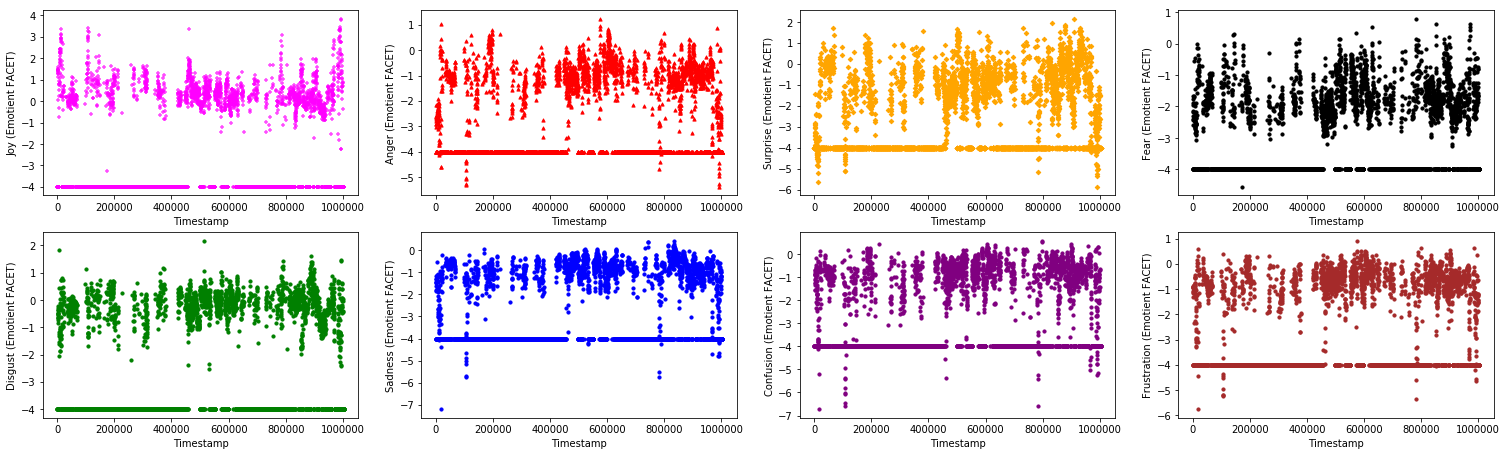

In [19]:
# visualize the relationship between the features and the response using scatterplots
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6,ax7,ax8)) = plt.subplots(2, 4, sharey=False)

data.plot(kind='scatter', x='Timestamp', y='Joy (Emotient FACET)', ax=ax1, figsize=(26, 7.5), s=10, color="magenta", marker="+", alpha=.7)
data.plot(kind='scatter', x='Timestamp', y='Anger (Emotient FACET)', ax=ax2, s=10, color="red",marker="^")
data.plot(kind='scatter', x='Timestamp', y='Surprise (Emotient FACET)', ax=ax3, s=10,  color="orange", marker="D")
data.plot(kind='scatter', x='Timestamp', y='Fear (Emotient FACET)', ax=ax4, s=10,  color="black")
data.plot(kind='scatter', x='Timestamp', y='Disgust (Emotient FACET)', ax=ax5, s=10, color="green")
data.plot(kind='scatter', x='Timestamp', y='Sadness (Emotient FACET)', ax=ax6, s=10, color="blue")
data.plot(kind='scatter', x='Timestamp', y='Confusion (Emotient FACET)', ax=ax7, s=10, color="purple")
data.plot(kind='scatter', x='Timestamp', y='Frustration (Emotient FACET)', ax=ax8, s=10, color="brown")


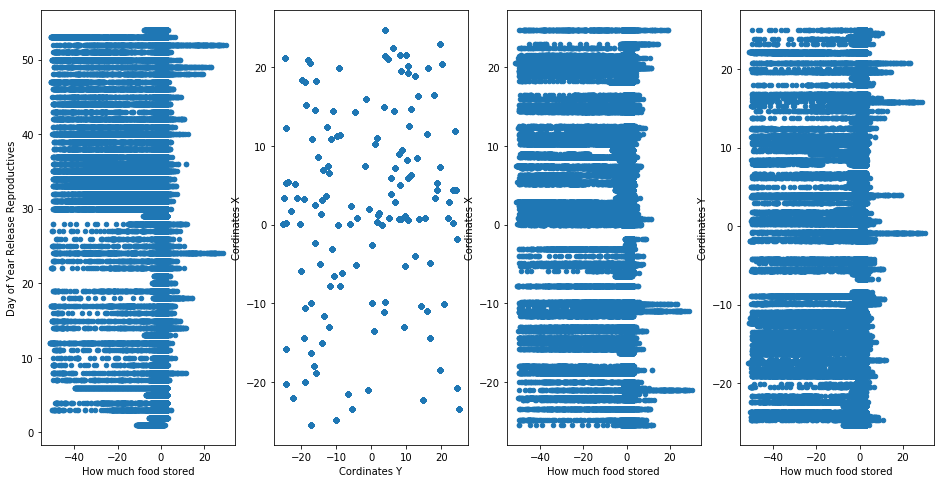

In [57]:
fig, axs = plt.subplots(1, 4, sharey=False)
data.plot(kind='scatter', x='How much food stored', y='ReleaseReproductives', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Cordinates Y', y='Cordinates X', ax=axs[1])
data.plot(kind='scatter', x='How much food stored', y='Cordinates X', ax=axs[2])
data.plot(kind='scatter', x='How much food stored', y='Cordinates Y', ax=axs[3])

In [80]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

In [ ]:
CordinatesX + CordinatesY + ColorOfNest + Howmuchfoodstored

In [89]:
lm = smf.ols(formula='ReleaseReproductives ~ Time + CordinatesX + CordinatesY + ColorOfNest + Howmuchfoodstored', data=data).fit() 
         

In [90]:
lm.params

Intercept            25.246751
Time                  0.000808
CordinatesX          -0.109291
CordinatesY          -0.137406
ColorOfNest           0.036031
Howmuchfoodstored    -0.218724
dtype: float64

In [91]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     ReleaseReproductives   R-squared:                       0.071
Model:                              OLS   Adj. R-squared:                  0.071
Method:                   Least Squares   F-statistic:                     5607.
Date:                  Sat, 02 Dec 2017   Prob (F-statistic):               0.00
Time:                          13:15:08   Log-Likelihood:            -1.4889e+06
No. Observations:                367877   AIC:                         2.978e+06
Df Residuals:                    367871   BIC:                         2.978e+06
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            25.2468      0.062    405.607      0.000      25.125      25.369
Time                  0.0008   2.26e-05     35.812      0.000       0.001       0.001
CordinatesX          -0.1093      0.002    -61.566      0.000      -0.113      -0.106
CordinatesY          -0.1374      0.002    -87.884      0.000      -0.140      -0.134
ColorOfNest           0.0360      0.001     59.463      0.000       0.035       0.037
Howmuchfoodstored    -0.2187      0.003    -83.274      0.000      -0.224      -0.214
==============================================================================
Omnibus:                    65892.601   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14131.209
Skew:                           0.064   Prob(JB):                         0.00
Kurtosis:                       2.048   Cond. No.                     5.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

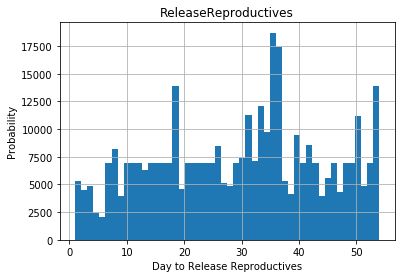

In [94]:
%matplotlib inline
x = data.column="ReleaseReproductives"
data.hist(x, normed=False, bins=50)
plt.ylabel('Probability');
plt.xlabel('Day to Release Reproductives');

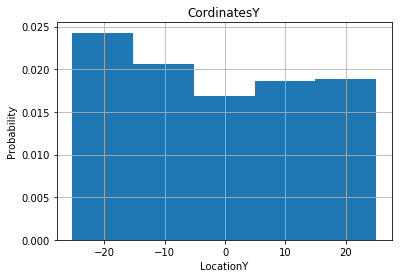

In [102]:
##### %matplotlib inline
x = data.column="CordinatesY"
data.hist(x, normed=True, bins= 5)
plt.ylabel('Probability');
plt.xlabel('LocationY');

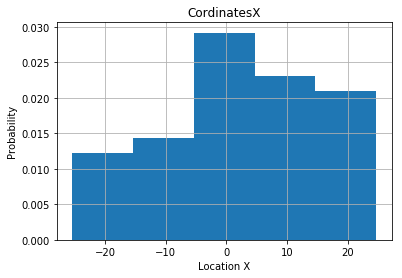

In [101]:
%matplotlib inline
x = data.column="CordinatesX"
data.hist(x, normed=True, bins=5)
plt.ylabel('Probability');
plt.xlabel('Location X');

In [103]:
# do the clustering
k_means = cluster.KMeans(n_clusters=7)
k_means.fit(data) 
labels = k_means.labels_

In [104]:
##checking input type compatible (not nan and such)
np.any(np.isnan(data))

False

In [105]:
np.all(np.isfinite(data))

True

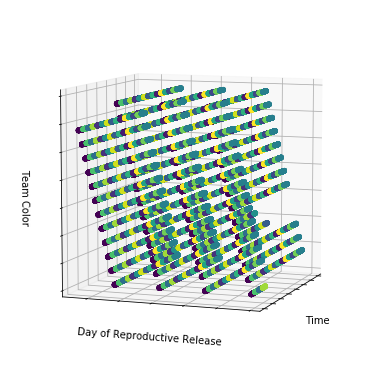

In [113]:
# plot the clusters in color
%matplotlib inline

fig = plt.figure(1, figsize=(5, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=8, azim=200)
plt.cla()

ax.scatter(data["Time"],data["ReleaseReproductives"], data["ColorOfNest"], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Time')
ax.set_ylabel('Day of Reproductive Release')
ax.set_zlabel('Team Color')

plt.show()

In [108]:
# Import the kmeans clustering model.
from sklearn.cluster import KMeans

# Initialize the model with 2 parameters -- number of clusters and random state.
kmeans_model = KMeans(n_clusters=15, random_state=1)
# Get only the numeric columns from games.
good_columns = data._get_numeric_data()
# Fit the model using the good columns.
kmeans_model.fit(good_columns)
# Get the cluster assignments.
labels = kmeans_model.labels_

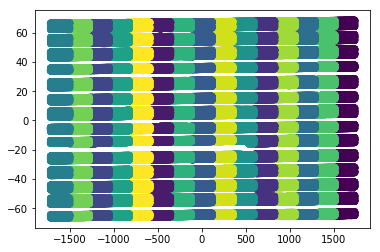

In [109]:
# Import the PCA model.
from sklearn.decomposition import PCA

# Create a PCA model.
pca_2 = PCA(2)
# Fit the PCA model on the numeric columns from earlier.
plot_columns = pca_2.fit_transform(good_columns)
# Make a scatter plot of each game, shaded according to cluster assignment.
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
# Show the plot.
plt.show()

In [110]:
data.corr()["ReleaseReproductives"]

Time                    0.063739
ReleaseReproductives    1.000000
CordinatesX            -0.135787
CordinatesY            -0.172787
ColorOfNest             0.113624
Howmuchfoodstored      -0.137325
Name: ReleaseReproductives, dtype: float64